In [20]:
%store -r

## Notebook 03

## Notebook 04

In [21]:
# Import packages
import holoviews as hv
import hvplot.pandas

## Notebook 05

In [22]:
# Advanced options on matplotlib/seaborn/pandas plots
import matplotlib.pyplot as plt
# Common statistical plots for tabular data
import seaborn as sns
# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression

## Download Data Notebook

In [23]:
# Import required packages
import earthpy
import pandas as pd

In [24]:
naples_url = (
    'https://www.ncei.noaa.gov/access/services/data/v1'
    '?dataset=daily-summaries'
    '&dataTypes=PRCP'
    '&stations=USC00086078'
    '&startDate=1943-01-01'
    '&endDate=2024-12-31'
    '&units=standard')
naples_url

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=PRCP&stations=USC00086078&startDate=1943-01-01&endDate=2024-12-31&units=standard'

In [25]:
# Download the climate data
naples_climate_df = pd.read_csv(
    naples_url,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN']
)

# Check that the download worked
naples_climate_df.head()

,STATION,PRCP
DATE,,
1943-01-01,USC00086078,0.0
1943-01-02,USC00086078,0.0
1943-01-03,USC00086078,0.0
1943-01-04,USC00086078,0.0
1943-01-05,USC00086078,0.0


<Axes: title={'center': 'Precipitation in Naples, FL'}, xlabel='Year', ylabel='Precipitation (in)'>

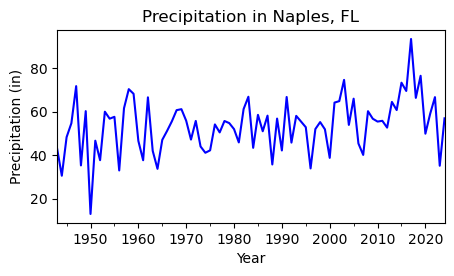

In [26]:
naples_climate_df.PRCP.resample('YS').sum().plot(
    title='Precipitation in Naples, FL',
    xlabel='Year',
    ylabel='Precipitation (in)',
    legend=False,
    color='blue',
    figsize=(5, 2.5))

In [27]:
naples_ann_prcp_df = (
    naples_climate_df[["PRCP"]]
    .resample('YS')
    .sum()
)
naples_ann_prcp_df

,PRCP
DATE,
1943-01-01,43.26
1944-01-01,30.60
1945-01-01,48.32
1946-01-01,54.71
1947-01-01,71.77
...,...
2020-01-01,49.92
2021-01-01,59.07
2022-01-01,66.72


In [28]:
#### This code prepared with the help of ChatGPT ####
# Remove rows with missing values
naples_clean_df = naples_ann_prcp_df.dropna(subset=['PRCP'])

# Getting data in the correct format for scikit-learn
X = (
    naples_clean_df
    # Pull out the year from the date
    .index.year
    # Getting values as arrays using .values
    .values
    # Reshape 'Year' column to be a 2D array for scikit-learn
    .reshape(-1, 1))
y = naples_clean_df['PRCP'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")


Slope: 0.1789608297689402
Intercept: -301.3185619442539


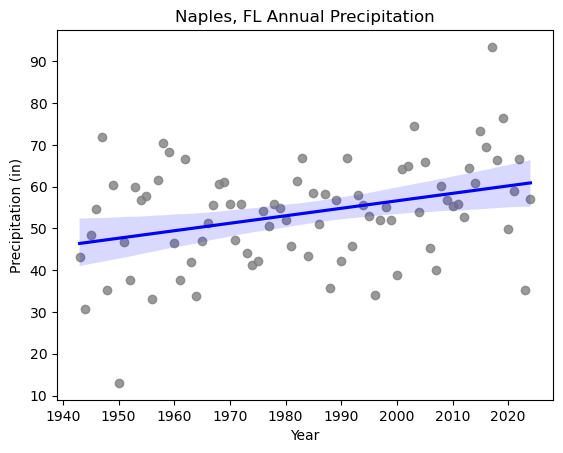

In [29]:
# Plot annual average temperature with a trend line
ax = sns.regplot(
    x=naples_ann_prcp_df.index.year, 
    y=naples_ann_prcp_df.PRCP,
    # change color (These two lines of code produced with the help of ChatGPT)
    line_kws={"color": "blue"},
    scatter_kws={"color": "gray"}
)
# Set plot labels
ax.set(
    title='Naples, FL Annual Precipitation',
    xlabel='Year',
    ylabel='Precipitation (in)'
)
# Save the plot as an image to embed in portfolio
# This line of code produced with the help of ChatGPT
plt.savefig("naples_precip.png", bbox_inches="tight", dpi=300)

# Display the plot without extra text
plt.show()

Citation: Menne, Matthew J., Imke Durre, Bryant Korzeniewski, Shelley McNeill,
Kristy Thomas, Xungang Yin, Steven Anthony, Ron Ray, Russell S. Vose, Byron 
E.Gleason, and Tamara G. Houston (2012): Global Historical Climatology 
Network - Daily (GHCN-Daily), Version 3. Naples, FL station USC00086078 
Precipitation Data. NOAA National Climatic Data Center. 
doi:10.7289/V5D21VHZ Accessed Sept. 23, 2025.

Matthew J. Menne, Imke Durre, Russell S. Vose, Byron E. Gleason, and Tamara G. 
Houston, 2012: An Overview of the Global Historical Climatology Network-Daily 
Database. J. Atmos. Oceanic Technol., 29, 897-910. 
doi:10.1175/JTECH-D-11-00103.1.

This precipitation data was taken by the NOAA NCEI, and more 
specifically at station USC00086078 in Naples, FL. The data was collected 
daily at this land-based station and was summed to represent total 
precipitation values for each year between 1943 and 2024.

In [30]:
# Save the climate data
naples_climate_df.to_csv('naples_climate_data')

In [31]:
%store naples_climate_df naples_url

Stored 'naples_climate_df' (DataFrame)
Stored 'naples_url' (str)
